In [1]:
pip install gym

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import dependencies
import numpy as np
import gym
import random
import time
from IPython.display import clear_output

In [3]:
env = gym.make("FrozenLake-v1")

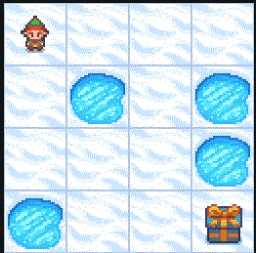

In [4]:
from IPython.display import Image
Image("frozen_lake.png")

| State | Description                    | Reward |
|-------|:------------------------------:|-------:|
| S     |  Agent's starting point - safe |       0|
| F     |  Frozen surface - safe         |       0|
| H     |  Hole - game over              |       0|
| G     |  Goal - game over              |       1|

**Action:  Left, Right, Up, Down**

In [5]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

q_table = np.zeros((state_space_size, action_space_size))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [6]:
num_episodes = 10000 #total no. of episodes the agent will play during training
max_steps_per_episode = 500 #one of the terminating condition, max no. steps in a single episode

learning_rate = 0.1 #high LR focus more on new, less on old; low LR learn nothing, use prior knowledge
discount_rate = 0.99 #high DR focus more on distant reward, low DR focus more on immediate reward

#epsilon-greedy
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.01

### Trainning Phase

In [7]:
rewards_all_episodes = []
all_epochs = []
epochs = 0
# Q-learning algorithm
for episode in range(num_episodes):
    state = env.reset()[0] #reset state of the env back to the starting state
    done = False #this makes sure whether or not the episode is finished, initialized to false
    rewards_current_episode = 0 #no rewards at the beginning of each episode
    # initialize new episode params for each time step
    epochs += 1
    for step in range(max_steps_per_episode): 
        # Exploration-exploitation trade-off
        exploration_rate_threshold = random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state,:])
            #print(action)
        else:
            action = env.action_space.sample()
        # Take new action
        new_state, reward, done, truncated, info = env.step(action)
        # Update Q-table for Q(s,a)
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
        learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
        # Transition to the next state
        state = new_state
        # Add new reward        
        rewards_current_episode += reward
        if done == True: 
            break
    # Exploration rate decay (at the end of one episode, we need to update the exploration rate)
    exploration_rate = min_exploration_rate + \
    (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    # Add current episode reward to total rewards list
    rewards_all_episodes.append(rewards_current_episode)
    all_epochs.append(epochs)

# Calculate and print the average reward per thousand episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000) 
#np.split: This helps to print the average reward per x episodes divides arrays into subarrays in N (where N = num_episodes/x) equal arrays

count = 1000
print("********Average reward per thousand episodes********\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

********Average reward per thousand episodes********

1000 :  0.3030000000000002
2000 :  0.5880000000000004
3000 :  0.5610000000000004
4000 :  0.6880000000000005
5000 :  0.6650000000000005
6000 :  0.7070000000000005
7000 :  0.6720000000000005
8000 :  0.7110000000000005
9000 :  0.6890000000000005
10000 :  0.6940000000000005


### Analysis: 

- After 10000 episodes, we can observe the maximum average reward per 1000 episodes to be 0.728 which implies the agent wins around 72.8% of the time. 

- Increasing maximum number of time steps per episode can yield better result - 78.2% (for 500 steps/episode)

In [8]:
# Print updated Q-table
print("\n\n********Q-table********\n")
print(q_table)



********Q-table********

[[0.51851121 0.45771818 0.47138544 0.43029434]
 [0.07091788 0.29808005 0.04805729 0.09587012]
 [0.27000508 0.14694212 0.09925256 0.15009213]
 [0.02057913 0.         0.         0.        ]
 [0.54567783 0.40881582 0.43097513 0.32101472]
 [0.         0.         0.         0.        ]
 [0.31408996 0.04296788 0.11118344 0.03123522]
 [0.         0.         0.         0.        ]
 [0.39765177 0.28788326 0.44573707 0.59080782]
 [0.43712331 0.68751609 0.34080669 0.35092858]
 [0.6865119  0.37774342 0.32256717 0.32268008]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.54834701 0.4342401  0.79870357 0.55745876]
 [0.73547435 0.86387673 0.76789683 0.73441991]
 [0.         0.         0.         0.        ]]


### Agent playing the game

In [ ]:
# Watch our agent play Frozen Lake by playing the best action 
# from each state according to the Q-table

for episode in range(3):
    # initialize new episode params
    state = env.reset()[0]
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(1)
    for step in range(max_steps_per_episode):  
        # Show current state of environment on screen
        clear_output(wait=True)
        env.render()
        time.sleep(0.3)
        # Choose action with highest Q-value for current state
        action = np.argmax(q_table[state,:])        
        # Take new action
        new_state, reward, done, truncated, info = env.step(action)
        if done:
            clear_output(wait=True)
            env.render()
            if reward == 1:
                # Agent reached the goal and won episode
                print("****You reached the goal!****")
                time.sleep(3)
            else:
                # Agent stepped in a hole and lost episode
                print("****You fell through a hole!****")
                time.sleep(3)
            clear_output(wait=True)
            break
        # Set new state
        state = new_state
env.close()